
# Anisotropic Multifractional Brownian field 1

.. codeauthor:: Frédéric Richard <frederic.richard_at_univ-amu.fr>

In this example, we show how to simulate heterogeneous textures whose
pattern orientation spatially varies. Such textures can be obtained
by simulating a turning band field with a space-dependent Hurst function
represented as a step function.

Here, the Hurst function $\beta_{(x,y)}$ is defined at position
$(x, y)$ by translating an initial Hurst function $\beta_0$

\begin{align}\beta_{(x,y)}(s)  = \beta_0\left(s - \frac{y}{N} \phi_1\right),
        \forall s \in \mathbb{R}.\end{align}

for some fixed orientation $\phi_1$. The orientation of the
generated texture varies in the vertical direction while its roughness and
degree of anisotropy remain the same. Such a simulation
was used for illustration and experiments in :cite:p:`Vu2020`.

<div class="alert alert-info"><h4>Note</h4><p>Such simulations are related to the so-called
  **anisotropic multifractional Brownian field**
  which was investigated :cite:p:`Vu2020`. In a harmonizable
  representation, these fields are defined as

  .. math::
      Z(x, y) = \int_{\mathbb{R}^2}
      (e^{i\langle (x, y), w \rangle} -1 ) \tau_{(x, y)}(w)
      \vert w \vert^{-\beta_{x, y}(w) -1}
      dW(w),

  where $dW$ stands for a complex Brownian measure.</p></div>


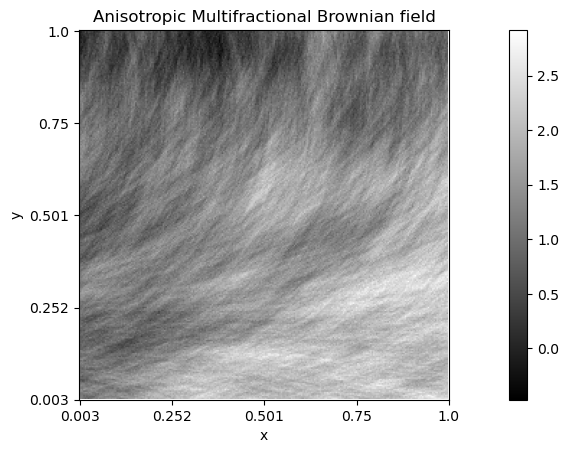

In [1]:
import numpy as np
from afbf import coordinates, sdata, tbfield

N = 256  # Image size.

pid = np.pi / 8  # length of a step of the Hurst function.
dpid = np.pi / 16  # length of the transition between steps.
phi1 = np.pi / 2  # orientation at y=N-1

# Define a field.
Z = tbfield('afbf-smooth')

# Change the parameters of the Hurst function.
Z.hurst.ChangeParameters(
    np.array([0.8, 0.2]),
    np.array([- pid - dpid, - pid, pid, pid + dpid])
    )
Z.hurst.trans = 1  # Indicate where to locate step transition.
Z.NormalizeModel()  # Normalize the model.

# Set coordinates.
coord = coordinates(N)  # field coordinates.
coordy = coordinates()  # subset of coordinates.
x = np.reshape(np.arange(1, N+1), (N, 1))

# Initialize an image.
z = sdata(coord)
z.name = 'Anisotropic Multifractional Brownian field'

for y in range(N):
    # Translate the Hurst and topothesy functions.
    trans = y / (N - 1) * phi1
    Z.hurst.ApplyTransforms(trans)
    Z.topo.ApplyTransforms(trans)

    # Restrict to coordinates (:, y).
    coordy.DefineNonUniformLocations(
        np.concatenate((x, (y+1) * np.ones((N, 1))), axis=1))
    coordy.N = coord.N

    # Simulate the current field keeping a same random seed.
    np.random.seed(3)
    zy = Z.Simulate(coordy)

    # Keep the simulation at positions  (y, :).
    z.values.reshape(N, N)[y, :] = zy.values.reshape(1, N)[0, 0:N]

# Display the simulation.
z.Display()